In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [3]:
majors = pd.read_csv('college_majors1.csv')
majors.drop(columns=['Unnamed: 0'], inplace=True)
majors.head()

,Major,Major_category,Grad_total,Grad_unemployment_rate,Grad_median,Nongrad_unemployment_rate,Grad_share,Grad_premium,ShareWomen,Unemployment_rate
0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,0.087543,75000.0,0.050661,0.096320,0.153846,0.090713,0.060023
1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,0.057756,60000.0,0.068386,0.104420,0.250000,0.690365,0.096798
2,HOSPITALITY MANAGEMENT,Business,24417,0.073867,65000.0,0.048423,0.119837,0.300000,0.651660,0.061169
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,0.080901,47000.0,0.052900,0.125878,0.129808,0.584776,0.055677
4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,0.058411,57000.0,0.072800,0.144753,0.096154,0.366177,0.119511


In [4]:
X = pd.read_csv('X_majors.csv')
y = pd.read_csv('y_majors.csv', header=None)

X.drop(columns=['Unnamed: 0'], inplace=True) # drop 0 col
y.drop(columns=[0], inplace=True) # drop 0 col
y.rename(columns={1:'Grad_median'}, inplace=True) # rename
y.head()

,Grad_median
0,0.318182
1,0.147727
2,0.204545
3,0.000000
4,0.113636


In [7]:
print(X.shape, y.shape)
X.head()

(172, 195) (172, 1)


,Grad_total,Grad_unemployment_rate,Nongrad_unemployment_rate,Grad_share,Grad_premium,ShareWomen,Unemployment_rate,Major_ACCOUNTING,Major_ACTUARIAL SCIENCE,Major_ADVERTISING AND PUBLIC RELATIONS,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0.006453,0.632014,0.314847,0.000000,0.106962,0.093619,0.338680,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.044243,0.416965,0.425004,0.009702,0.164468,0.712485,0.546180,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019343,0.533277,0.300938,0.028169,0.194371,0.672540,0.345147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003272,0.584061,0.328761,0.035406,0.092585,0.603513,0.314157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.006399,0.421692,0.452438,0.058014,0.072458,0.377910,0.674343,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
### LINEAR REGRESSION ###
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_test, y_test) # R^2

0.7047234401986651

In [29]:
pred = linreg.predict(X_test)

Text(0, 0.5, 'Predicted')

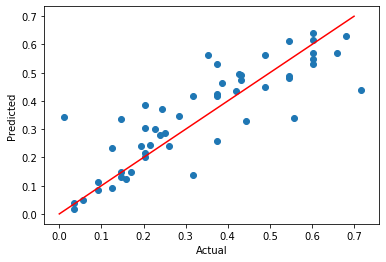

In [30]:
# Plot Performance of Predictions
x = np.linspace(0, 0.7)
y = x
plt.plot(x, y, 'r')

plt.scatter(y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [31]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
model.fit()

In [32]:
model.fit().summary()

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1376: RuntimeWarning: invalid value encountered in multiply
  cov_p = s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Grad_median   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                nan
Time:                        22:20:08   Log-Likelihood:                 3988.2
No. Observations:                 120   AIC:                            -7736.
Df Residuals:                       0   BIC:                            -7402.
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Grad_total                                                                  0.1032        inf          0        nan         nan         nan
Grad_unemployment_rate                                                      0.1045        inf          0        nan         nan         nan
Nongrad_unemployment_rate                                                   0.0425        inf          0        nan         nan         nan
Grad_share                                                                  0.2884        inf          0        nan         nan         nan
Grad_premium                                                                0.4315        inf          0        nan         nan         nan
ShareWomen                                                                 -0.1464        inf         -0        nan         nan         nan
Unemployment_rate                                                           0.1144        inf          0        nan         nan         nan
Major_ACCOUNTING                                                            0.0358        inf          0        nan         nan         nan
Major_ACTUARIAL SCIENCE                                                  5.528e-18        inf          0        nan         nan         nan
Major_ADVERTISING AND PUBLIC RELATIONS                                   7.094e-17        inf          0        nan         nan         nan
Major_AEROSPACE ENGINEERING                                              3.602e-17        inf          0        nan         nan         nan
Major_AGRICULTURAL ECONOMICS                                                0.1081        inf          0        nan         nan         nan
Major_AGRICULTURE PRODUCTION AND MANAGEMENT                                 0.0366        inf          0        nan         nan         nan
Major_ANIMAL SCIENCES                                                       0.0121        inf          0        nan         nan         nan
Major_ANTHROPOLOGY AND ARCHEOLOGY                                          -0.0792        inf         -0        nan         nan         nan
Major_APPLIED MATHEMATICS                                                   0.1432        inf          0        nan         nan         nan
Major_ARCHITECTURAL ENGINEERING                                            -0.0697        inf         -0        nan         nan         nan
Major_ARCHITECTURE                                                         -0.2504        inf         -0        nan         nan         nan
Major_AREA ETHNIC AND CIVILIZATION STUDIES                                  0.0459        inf          0        nan         nan         nan
Maj

In [33]:
### RANDOM FOREST ###
"""rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel().astype('int')) # model = 
#y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_test.astype('int'), y_pred)

#print('Accuracy: ', accuracy)
#from sklearn.metrics import f1_score
#print('f1: ', f1_score(y_test.astype('int'), y_pred, average='weighted'))

print('Score: ', rf.score(X_test, y_test.astype('int')))
cvs = cross_val_score(rf, X_test, y_test.values.ravel().astype('int'), cv=5)
print(cvs, 'Mean: ', cvs.mean())"""

"rf = RandomForestClassifier()\nrf.fit(X_train, y_train.values.ravel().astype('int')) # model = \n#y_pred = model.predict(X_test)\n#accuracy = accuracy_score(y_test.astype('int'), y_pred)\n\n#print('Accuracy: ', accuracy)\n#from sklearn.metrics import f1_score\n#print('f1: ', f1_score(y_test.astype('int'), y_pred, average='weighted'))\n\nprint('Score: ', rf.score(X_test, y_test.astype('int')))\ncvs = cross_val_score(rf, X_test, y_test.values.ravel().astype('int'), cv=5)\nprint(cvs, 'Mean: ', cvs.mean())"

In [34]:
reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train.values.ravel().astype('int'))

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [35]:
print('Score: ', reg.score(X_test, y_test.astype('int')))

Score:  0.0


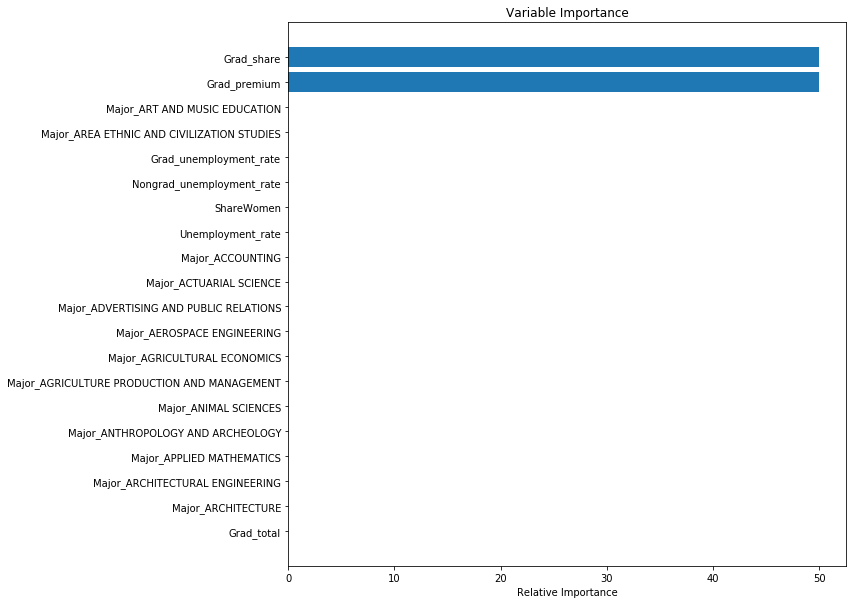

In [36]:
feature_importance = reg.feature_importances_
# importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:20]
sorted_idx = np.argsort(feature_importance)[:20]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size

plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [104]:
### PCR ###
pca = PCA()
X_tr = pca.fit(X_train)
X_tr = pca.transform(X_train)
y_tr = pca.transform(y_train)
X_te = pca.transform(X_test)
y_te = pca.transform(y_test)

In [105]:
reg = LinearRegression()
reg.fit(X_tr, y_tr)
reg.score(X_te, y_te)

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.976991756538335

In [106]:
pca.explained_variance_ratio_

array([1.00682468e-01, 6.35401196e-02, 5.76197462e-02, 4.52123821e-02,
       4.13611743e-02, 3.73754503e-02, 3.33725943e-02, 3.11610401e-02,
       3.00924265e-02, 2.68119902e-02, 2.66178234e-02, 2.43484059e-02,
       2.29497711e-02, 2.12073314e-02, 1.54789595e-02, 1.30055710e-02,
       1.09698262e-02, 1.06197695e-02, 9.46408414e-03, 8.79490127e-03,
       8.14560516e-03, 7.01070176e-03, 6.96182914e-03, 6.39548428e-03,
       5.46676560e-03, 5.11868190e-03, 4.64827500e-03, 4.45645026e-03,
       4.27050196e-03, 3.90161464e-03, 3.78106266e-03, 3.73719063e-03,
       3.59947067e-03, 3.57761711e-03, 3.50874016e-03, 3.50874016e-03,
       3.50874016e-03, 3.50874016e-03, 3.50874016e-03, 3.50874016e-03,
       3.50874016e-03, 3.50874016e-03, 3.50874016e-03, 3.50874016e-03,
       3.50874016e-03, 3.50874016e-03, 3.50874016e-03, 3.50874016e-03,
       3.50874016e-03, 3.50874016e-03, 3.50874016e-03, 3.50874016e-03,
       3.50874016e-03, 3.50874016e-03, 3.50874016e-03, 3.50874016e-03,
      